# Webscrapping using BeautifulSoup

This application aims to obtain data from the Indonesian Rupiahs (IDR) per US Dollar (USD)
The table below shows historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 9/6/2020 and 3/4/2021 on the web page in html form then converted into a DataFrame for the data analysis process. 

<img src="assets/usd_idr_exchange_rate.jpg" alt="usd_idr_exchange_rate" style="width:500px;"/>


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

<img src="assets/inspect_usd_idr_exchange_rate.png" alt="usd_idr_exchange_rate" style="width:500px;"/>

After finding the HTML tag in the form of the `table` and `class` CSS tags from the data to be retrieved as shown in the picture above, the search is carried out using the `find()` function with the initial parameter with the `table` tag and the second parameter to get the table tag in the form of` dictionary` of CSS class names.

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-4-2021">
     14,261.85426
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-4-2021">
     USD IDR rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


Locate the table row tr and then use it to retrieve the required values through the loop

In [6]:
tr = table.find_all('tr')
tr[:2] #2 baris pertama

[<tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>]

At this point, each row containing the date value data and the exchange rate will be looped, then stored in the temp variable.


In [7]:
temp = [] 

for i in range(1, len(tr)):
    row = table.find_all('tr') [i]
    
    if(len(row) !=1):
        date=row.find_all ('td')[0].text
        date=date.strip()
        
        rate=row.find_all('td')[2].text
        rate=rate.strip()
        
        temp.append((date,rate))


    
temp [:5]

[('3/3/2021', '14,257.29443 IDR'),
 ('3/2/2021', '14,256.28041 IDR'),
 ('3/1/2021', '14,248.60576 IDR'),
 ('2/26/2021', '14,300.27815 IDR'),
 ('2/25/2021', '14,139.73096 IDR')]

In [8]:
len(temp)

132

## Creating data frame & Data wrangling

Put data in temp variable into Dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','rate'))
df.head()

,date,rate
0,3/3/2021,"14,257.29443 IDR"
1,3/2/2021,"14,256.28041 IDR"
2,3/1/2021,"14,248.60576 IDR"
3,2/26/2021,"14,300.27815 IDR"
4,2/25/2021,"14,139.73096 IDR"


The first data cleaning process is to change the data type from the date column to the datetime64 data type so that calculations can be done. Then, in the rate column, remove the comma character and remove the IDR character then change the data type to int64 so that the calculation can be done. Finally, because the operation to change the data type from the rate column has become int64, the data cleaning process itself has been completed.



In [10]:
df['date'] = pd.to_datetime(df['date'])
df['rate'] = df['rate'].str.replace('IDR','').str.replace(',','')
df['rate'] = df['rate'].astype('float64')


In [11]:
df.head()

,date,rate
0,2021-03-03,14257.29443
1,2021-03-02,14256.28041
2,2021-03-01,14248.60576
3,2021-02-26,14300.27815
4,2021-02-25,14139.73096


In [12]:
df.tail()

,date,rate
127,2020-09-10,14871.58664
128,2020-09-09,14783.50009
129,2020-09-08,14839.54267
130,2020-09-07,14743.92989
131,2020-09-06,14754.95155


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Analysis, Visualisation and Conclusion
 

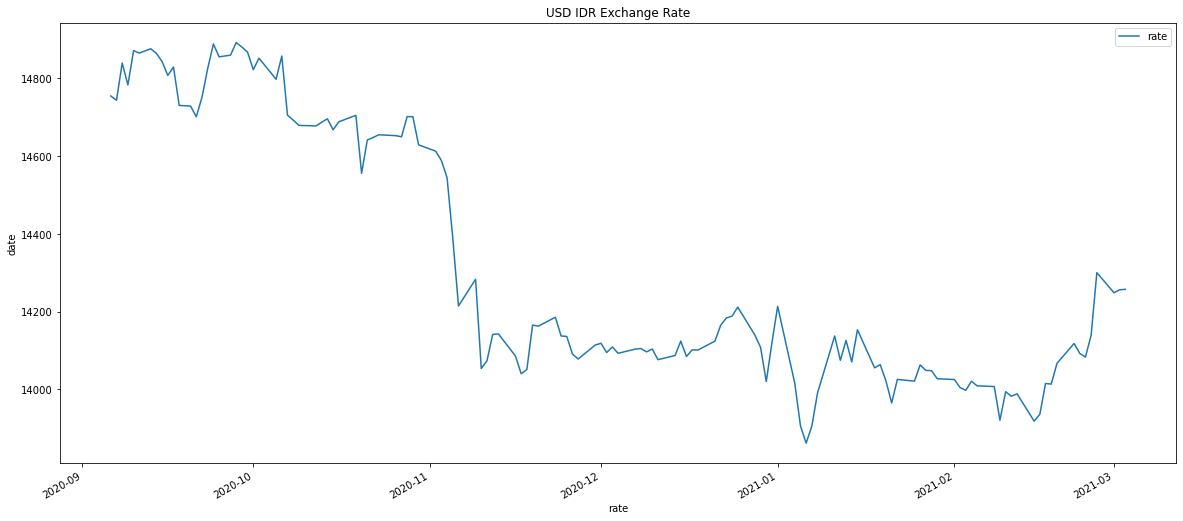

In [19]:
df.plot(x="date",figsize = (20,9))

import matplotlib.pyplot as plt
plt.xlabel("rate") 
plt.ylabel("date")
plt.title("USD IDR Exchange Rate")
plt.show()

In [22]:
 df[df['rate'] == df['rate'].min()]

,date,rate
40,2021-01-06,13861.51463


In [23]:
 df[df['rate'] == df['rate'].max()]

,date,rate
112,2020-09-28,14892.32194


In [25]:
df['rate'].mean()

14322.531547045459

## Conclusion

* The smallest exchange rate occurred on January 6, 2021, when the Indonesian rupiah touched a price of IDR 13,861 per US dollar

* The highest exchange rate occurred on September 28, 2020. Rupiah almost touched the price of IDR 15,000, which is IDR 14,892 per US dollar.

* The average exchange rate that occurred in 11 months was IDR 14,322 


<div style="text-align: right"> with love,
Putu Sanisa Pascaline</div>